## SemEval Dataset 2022 EDA
 - Author: Nana
 - Created: 2022/07/14

[SemEval dataset (En)](https://github.com/jerbarnes/semeval22_structured_sentiment/tree/master/data#data-and-formatting)
```
        cd /share/home/nana2929/semEval22/Structured_Sentiment/data
```
 - opener_en (English hotel reviews) 
     - domain: 旅館
     - 平均每筆資料標記出的opinions數量: 1.5筆左右
 - darmstadt_unis (English online university reviews): 
     - domain: 校園
     - 平均每筆資料標記出的opinions數量: 0.4筆左右 (很多reviews無標記）
 - MPQA: 
     - domain: 政治
     - 平均每筆資料標記出的opinions數量: 0.3筆左右 (很多reviews無標記）
 - 資料數量
    
    |split\dataset|opener_en|darmstadt_unis|mpqa|
    |-------|------|------|-------|
    |train  |1744 |2253|5643|
    |dev    |249|232|1997|
    |test   |499|318|2055|

 - 無情緒標記資料數量
    
    |split\dataset|opener_en|darmstadt_unis|mpqa|
    |-------|------|------|-------|
    |train  |344|1572|4389|
    |dev    |51|150|1581|
    |test   |92|214|1665|


In [1]:
import json 
from collections import defaultdict
import os

In [2]:
from collections import defaultdict
import pandas as pd
import numpy as np
import os
import json

In [3]:
data_root = '/share/home/nana2929/semEval22/Structured_Sentiment/data/'
datasets = ['opener_en', 'darmstadt_unis', 'mpqa']
splits = ['train', 'dev', 'test']
filesuffix =  '.json'

In [4]:
all_datas = defaultdict(dict)

for dataset in datasets:
    for split in splits:
        path = os.path.join(data_root, dataset, split + filesuffix)
        print(f'Loading {path}.')
        with open(path, 'r') as f:
            op_split = json.load(f)
        all_datas[dataset][split] = op_split 

Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/opener_en/train.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/opener_en/dev.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/opener_en/test.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/darmstadt_unis/train.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/darmstadt_unis/dev.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/darmstadt_unis/test.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/mpqa/train.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/mpqa/dev.json.
Loading /share/home/nana2929/semEval22/Structured_Sentiment/data/mpqa/test.json.


### Overall statistics

In [5]:
op = pd.Series(
    index=["train", "dev", "test"], 
    name="opener",
    dtype=np.int32)
op.train = len(all_datas['opener_en']['train'])
op.dev =  len(all_datas['opener_en']['dev'])
op.test =  len(all_datas['opener_en']['test'])

In [6]:
d = 'darmstadt_unis'
darm = pd.Series(
    index=["train", "dev", "test"], 
    name = d,
    dtype=np.int32)
darm.train = len(all_datas[d]['train'])
darm.dev =  len(all_datas[d]['dev'])
darm.test =  len(all_datas[d]['test'])

m = 'mpqa'
mpqa= pd.Series(
    index=["train", "dev", "test"], 
    name = m,
    dtype=np.int32)
mpqa.train = len(all_datas[m]['train'])
mpqa.dev =  len(all_datas[m]['dev'])
mpqa.test =  len(all_datas[m]['test'])

In [7]:
all_stats = pd.concat([op, darm, mpqa], axis=1)
all_stats

,opener,darmstadt_unis,mpqa
train,1744,2253,5643
dev,249,232,1997
test,499,318,2055


In [16]:
import random 
import matplotlib.pyplot as plt
import numpy as np

## A. opener_en

### 1. training data random example

In [85]:
dataset_ = 'opener_en'
print(f'index {rand}')
opener = all_datas[dataset_]
rand = random.randint(0, len(opener['train']))
opener['train'][rand]

index 728


{'sent_id': 'opener_en/kaf/hotel/english00190_e21978b83fc34738690f427f3d55e364-9',
 'text': 'I was concerning whether my booking was confirmed .',
 'opinions': []}

In [33]:
print(*opener['train'][3]['opinions'][0])

Source Target Polar_expression Polarity Intensity


### 2. percentile plots of "opinion numbers per review text"

percentile plot code snippet: https://stackoverflow.com/questions/18153054/percentiles-on-x-axis-with-matplotlib

===== opener_en: train =====
median: 1.0, minimum: 0, maximum: 17, average: 1.654
zero-opinion reviews: 344

===== opener_en: dev =====
median: 1.0, minimum: 0, maximum: 13, average: 1.606
zero-opinion reviews: 51

===== opener_en: test =====
median: 1.0, minimum: 0, maximum: 18, average: 1.733
zero-opinion reviews: 92



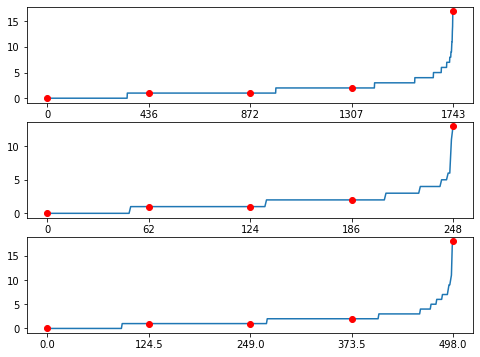

In [104]:
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0]) # Percentile values

# check opinion 數量區間表格 
# plotting? 
fig, ax = plt.subplots(3, figsize=(8,6))#plt.subplot(1, 3, split_id, figsize=(10, 15))
for split_id, split in enumerate(splits):
    print(f'===== opener_en: {split} =====')
    lengths = [len(opener[split][i]['opinions']) for i in range(len(opener[split]))]
    lengths.sort()
    medi, maxi, mini = np.median(lengths), max(lengths), min(lengths)
    avg = round(sum(lengths)/len(lengths), 3)
    print('median: {}, minimum: {}, maximum: {}, average: {}'.format(medi, mini, maxi, avg))
    print('zero-opinion reviews: {}\n'.format(lengths.count(0)))
    perc = np.percentile(lengths, q = p)
    ax[split_id].plot(lengths)
    # Place red dots on the percentiles
    ax[split_id].plot((len(lengths)-1) * p/100., perc, 'ro')
    # Set tick locations and labels
    ax[split_id].set_xticks((len(lengths)-1) * p/100.)
fig.show()

### 3. checking targets (top *n*)
將該資料集所有splits都pool在一起計算。

In [47]:
opener_chained = [*opener['train'], *opener['dev'], *opener['test']]

In [53]:
from collections import Counter
targets = [x['opinions'][i]['Target'][0] for x in opener_chained for i in range(len(x['opinions']))]
flat_targets = [x for xs in targets for x in xs]
target_counter = Counter(flat_targets)
target_counter.most_common(15)

[('hotel', 198),
 ('it', 111),
 ('staff', 85),
 ('location', 75),
 ('The hotel', 58),
 ('room', 54),
 ('food', 52),
 ('rooms', 50),
 ('Hotel', 46),
 ('breakfast', 45),
 ('the hotel', 43),
 ('It', 41),
 ('The rooms', 41),
 ('The staff', 36),
 ('this hotel', 36)]

## B. darmstadt_unis
darms 完全都在講學校（9校）的評價，而且reviews中完全無opinions標記者較opener更多。

### 1. training data example

In [94]:
dataset_ = 'darmstadt_unis'
print(f'index {rand}')
darms = all_datas[dataset_]
rand = random.randint(0, len(darms['train']))
darms['train'][rand]

index 331


{'sent_id': 'Colorado_Technical_University_Online_61_01-28-2006-5',
 'text': "I went to one of the best private universities in the country for my B.A . At both schools I've had good and bad professors .",
 'opinions': [{'Source': [[], []],
   'Target': [['professors'], ['113:123']],
   'Polar_expression': [['bad'], ['109:112']],
   'Polarity': 'Negative',
   'Intensity': 'Average'},
  {'Source': [[], []],
   'Target': [['professors'], ['113:123']],
   'Polar_expression': [['good'], ['100:104']],
   'Polarity': 'Positive',
   'Intensity': 'Average'}]}

### 2. percentile plots 

===== darms: train =====
median: 0.0, minimum: 0, maximum: 5, average: 0.358
zero-opinion reviews: 1572

===== darms: dev =====
median: 0.0, minimum: 0, maximum: 3, average: 0.422
zero-opinion reviews: 150

===== darms: test =====
median: 0.0, minimum: 0, maximum: 4, average: 0.409
zero-opinion reviews: 214



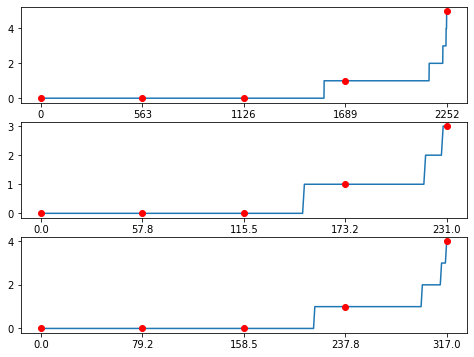

In [100]:
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0]) # Percentile values
dataset = darms
# check opinion 數量區間表格 
# plotting? 
fig, ax = plt.subplots(3, figsize=(8,6))#plt.subplot(1, 3, split_id, figsize=(10, 15))
for split_id, split in enumerate(splits):
    print(f'===== darms: {split} =====')
    lengths = [len(dataset[split][i]['opinions']) for i in range(len(dataset[split]))]
    lengths.sort()
    medi, maxi, mini = np.median(lengths), max(lengths), min(lengths)
    avg = round(sum(lengths)/len(lengths), 3)
    print('median: {}, minimum: {}, maximum: {}, average: {}'.format(medi, mini, maxi, avg))
    print('zero-opinion reviews: {}\n'.format(lengths.count(0)))
    perc = np.percentile(lengths, q = p)
    ax[split_id].plot(lengths)
    # Place red dots on the percentiles
    ax[split_id].plot((len(lengths)-1) * p/100., perc, 'ro')
    # Set tick locations and labels
    ax[split_id].set_xticks((len(lengths)-1) * p/100.)
fig.show() 

### 3. checking sense_id for universities, top *n* 
抓sense_id中出現的大學。

In [67]:
import re 

def getuni(string):
    pattern = r'(\w+_University|University_of_[a-zA-Z]+)'
    matches = re.finditer(pattern, string)
    return [m.group() for m in matches]

darms_chained = [*darms['train'], *darms['dev'], *darms['test']]
unis = [getuni(x['sent_id']) for x in darms_chained]
flat_unis = [x for xs in unis for x in xs]
unis_counter = Counter(flat_unis)
unis_counter.most_common(15)
unis_counter # 全部都是針對學校的評價 

Counter({'University_of_Phoenix': 1208,
         'Colorado_Technical_University': 458,
         'DeVry_University': 482,
         'University_of_Maryland_University': 221,
         'Capella_University': 345,
         'Jones_International_University': 13,
         'American_InterContinental_University': 57,
         'St_Leo_University': 17,
         'Northcentral_Online_University': 2})

### 4. checking targets and corresponding expressions
schools, professors, classes, program, 虛主詞...

In [82]:
pairs = []
for data in darms_chained:
    for op in data['opinions']:
        targets = op['Target']
        exprs = op['Polar_expression']
        t, e = targets[0], exprs[0]
        pairs.append((t[0], e[0]))
pair_counter = Counter(pairs)

In [84]:
pair_counter.most_common(15) 

[(('it', 'not'), 7),
 (('school', 'not'), 5),
 (('professors', 'very'), 4),
 (('UOP', 'not'), 4),
 (('They', 'very'), 4),
 (('they', 'not'), 4),
 (('instructors', 'very'), 3),
 (('experience', 'very'), 3),
 (('school', 'Great'), 3),
 (('classes', 'great'), 3),
 (('UOP', "don't"), 3),
 (('classes', 'challenging'), 3),
 (('program', 'great'), 3),
 (('it', 'very'), 3),
 (('education', 'great'), 3)]

## C. MPQA
   - [mpqa dataset download point](https://mpqa.cs.pitt.edu/corpora/mpqa_corpus/)
   - [mpqa 3.0 README](https://mpqa.cs.pitt.edu/corpora/mpqa_corpus/mpqa_corpus_3_0/mpqa_3_0_readme.txt)

### 1. training data example 

In [95]:
dataset_ = 'mpqa'
print(f'index {rand}')
mpqa = all_datas[dataset_]
rand = random.randint(0, len(mpqa['train']))
mpqa['train'][rand]

index 2115


{'sent_id': '20020304/20.50.30-97-17',
 'text': 'We all know that even the targets in the Kyoto Protocol are only a first step if we want to prevent the severe consequences that climate change could have . "',
 'opinions': [{'Source': [[], []],
   'Target': [['to prevent the severe consequences that climate change could have'],
    ['89:154']],
   'Polar_expression': [['want'], ['84:88']],
   'Polarity': 'Positive',
   'Intensity': 'Average'},
  {'Source': [[], []],
   'Target': [['the severe consequences that climate change could have'],
    ['100:154']],
   'Polar_expression': [['want'], ['84:88']],
   'Polarity': 'Positive',
   'Intensity': 'Average'}]}

### 2. percentile plots

===== mpqa: train =====
median: 0.0, minimum: 0, maximum: 8, average: 0.302
zero-opinion reviews: 4389

===== mpqa: dev =====
median: 0.0, minimum: 0, maximum: 7, average: 0.285
zero-opinion reviews: 1581

===== mpqa: test =====
median: 0.0, minimum: 0, maximum: 5, average: 0.252
zero-opinion reviews: 1665



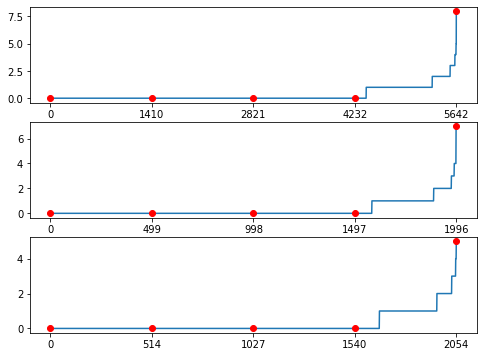

In [102]:
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0]) # Percentile values
dataset = mpqa
# check opinion 數量區間表格 
# plotting? 
fig, ax = plt.subplots(3, figsize=(8,6))#plt.subplot(1, 3, split_id, figsize=(10, 15))
for split_id, split in enumerate(splits):
    print(f'===== mpqa: {split} =====')
    lengths = [len(dataset[split][i]['opinions']) for i in range(len(dataset[split]))]
    lengths.sort()
    medi, maxi, mini = np.median(lengths), max(lengths), min(lengths)
    avg = round(sum(lengths)/len(lengths), 3)
    print('median: {}, minimum: {}, maximum: {}, average: {}'.format(medi, mini, maxi, avg))
    print('zero-opinion reviews: {}\n'.format(lengths.count(0)))
    perc = np.percentile(lengths, q = p)
    ax[split_id].plot(lengths)
    # Place red dots on the percentiles
    ax[split_id].plot((len(lengths)-1) * p/100., perc, 'ro')
    # Set tick locations and labels
    ax[split_id].set_xticks((len(lengths)-1) * p/100.)
fig.show() 

### 3. checking targets 
人權、美國、中國、恐怖主義、．．．domain: politics

In [106]:
from collections import Counter
mpqa_chained = [*mpqa['train'], *mpqa['dev'], *mpqa['test']]
targets = [x['opinions'][i]['Target'][0] for x in mpqa_chained for i in range(len(x['opinions']))]
flat_targets = [x for xs in targets for x in xs]
target_counter = Counter(flat_targets)
target_counter.most_common(30)

[('it', 41),
 ('him', 27),
 ('the United States', 26),
 ('Chavez', 25),
 ('Mugabe', 22),
 ('Israel', 17),
 ('they', 15),
 ('the Kyoto Protocol', 13),
 ('Zimbabwe', 13),
 ('he', 12),
 ('them', 12),
 ('China', 11),
 ('the election', 11),
 ('the US', 10),
 ('human rights', 9),
 ('terrorism', 8),
 ('you', 8),
 ('Argentina', 7),
 ('the government', 7),
 ('us', 7),
 ('Iran', 7),
 ('this', 6),
 ('It', 6),
 ('Iraq', 6),
 ('the Islamic Republic', 6),
 ('the President', 5),
 ('Taiwan', 5),
 ('Bush', 5),
 ('Washington', 5),
 ('Hugo Chavez', 5)]